In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd

In [3]:
import pandas as pd
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [27]:
df_transformed = pd.read_parquet("../data/scaled_features.parquet")

In [28]:
df_transformed = df_transformed[df_transformed['seg_difference']>0]

In [29]:
from libpysal.weights import Queen, KNN

In [30]:
from geosnap import DataStore
datasets=DataStore()

/Users/knaaptime/mambaforge/envs/seg_networks/lib/python3.9/site-packages/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(


In [31]:
msas = datasets.msas()

In [32]:
df_transformed = msas.set_index('geoid')[['geometry']].join(df_transformed)

In [33]:
df_transformed=df_transformed.dropna()

In [34]:
w = KNN.from_dataframe(df_transformed, k=8)

In [42]:
from esda import Moran, Moran_Local

In [61]:
mi = Moran.by_col(df_transformed, ['seg_difference', 'pct_diff'], w)

In [62]:
mi

,geometry,planar_measure,network_measure,streets_per_node_avg,street_length_total,street_segment_count,street_length_avg,intersection_count,intersection_density_km,self_loop_proportion,...,node_props_3way,street_density_km,meshedness,k_avg,gamma,circuity_avg,seg_difference_moran,seg_difference_p_sim,pct_diff_moran,pct_diff_p_sim
geoid,,,,,,,,,,,,,,,,,,,,,
10180,"POLYGON ((-100.14654 32.52279, -100.14642 32.5...",-2.272904,-1.974468,1.036759,16.216310,10.729919,5.486391,10.199733,1.326595,1.655073,...,1.235438,-0.713061,0.950304,0.950218,0.950307,-0.626938,0.159821,0.001,0.290757,0.001
10420,"POLYGON ((-81.39169 41.34827, -81.39164 41.348...",-1.382853,-1.241819,0.970513,16.399908,11.998784,4.401124,11.438267,3.658473,0.025155,...,0.047209,2.611625,-0.315451,-0.314636,-0.315481,-0.033997,0.159821,0.001,0.290757,0.001
10540,"POLYGON ((-123.25099 44.55198, -123.25240 44.5...",-2.562213,-2.192703,0.896348,16.181679,10.498857,5.682823,9.930568,1.236146,0.802874,...,0.272766,-0.513782,-1.662444,-1.662466,-1.662442,2.718630,0.159821,0.001,0.290757,0.001
10580,"POLYGON ((-74.09298 42.95587, -74.09381 42.959...",-1.843335,-1.615028,0.974327,16.812190,11.904853,4.907338,11.366523,2.450517,2.186480,...,1.370005,0.236492,-0.242604,-0.241820,-0.242633,0.053736,0.159821,0.001,0.290757,0.001
10900,"POLYGON ((-75.75781 40.73541, -75.75953 40.736...",-1.567313,-1.409252,0.991730,16.695306,12.003724,4.691582,11.452814,3.205232,-0.233136,...,0.419110,1.881552,0.088403,0.089211,0.088378,-0.148260,0.159821,0.001,0.290757,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,"POLYGON ((-80.45193 36.26151, -80.45192 36.261...",-1.283829,-1.178139,0.889060,16.762570,12.064734,4.697836,11.496806,2.925126,0.825052,...,0.400881,1.002622,-1.782479,-1.781620,-1.782532,-0.011005,0.159821,0.001,0.290757,0.001
49340,"POLYGON ((-72.10217 42.02887, -72.10242 42.028...",-1.857255,-1.609773,0.927987,16.872761,12.229731,4.643031,11.661949,3.059780,0.256735,...,0.004621,1.251643,-1.105152,-1.104267,-1.105197,0.029594,0.159821,0.001,0.290757,0.001
49620,"POLYGON ((-77.05440 40.02321, -77.05441 40.023...",-1.560098,-1.415226,0.927719,16.169092,11.406731,4.762361,10.839385,3.073734,0.078213,...,0.024647,1.713468,-1.106913,-1.106298,-1.106944,-0.062939,0.159821,0.001,0.290757,0.001


In [52]:
mi_pct = Moran(df_transformed.pct_diff.values, w)

In [37]:
mi.p_sim

0.001

In [53]:
mi_pct.p_sim

0.001

In [40]:
from splot.esda import plot_moran, plot_local_autocorrelation

(<Figure size 1000x400 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Reference Distribution'}, xlabel='Moran I: 0.16', ylabel='Density'>,
        <AxesSubplot:title={'center':'Moran Scatterplot (0.16)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

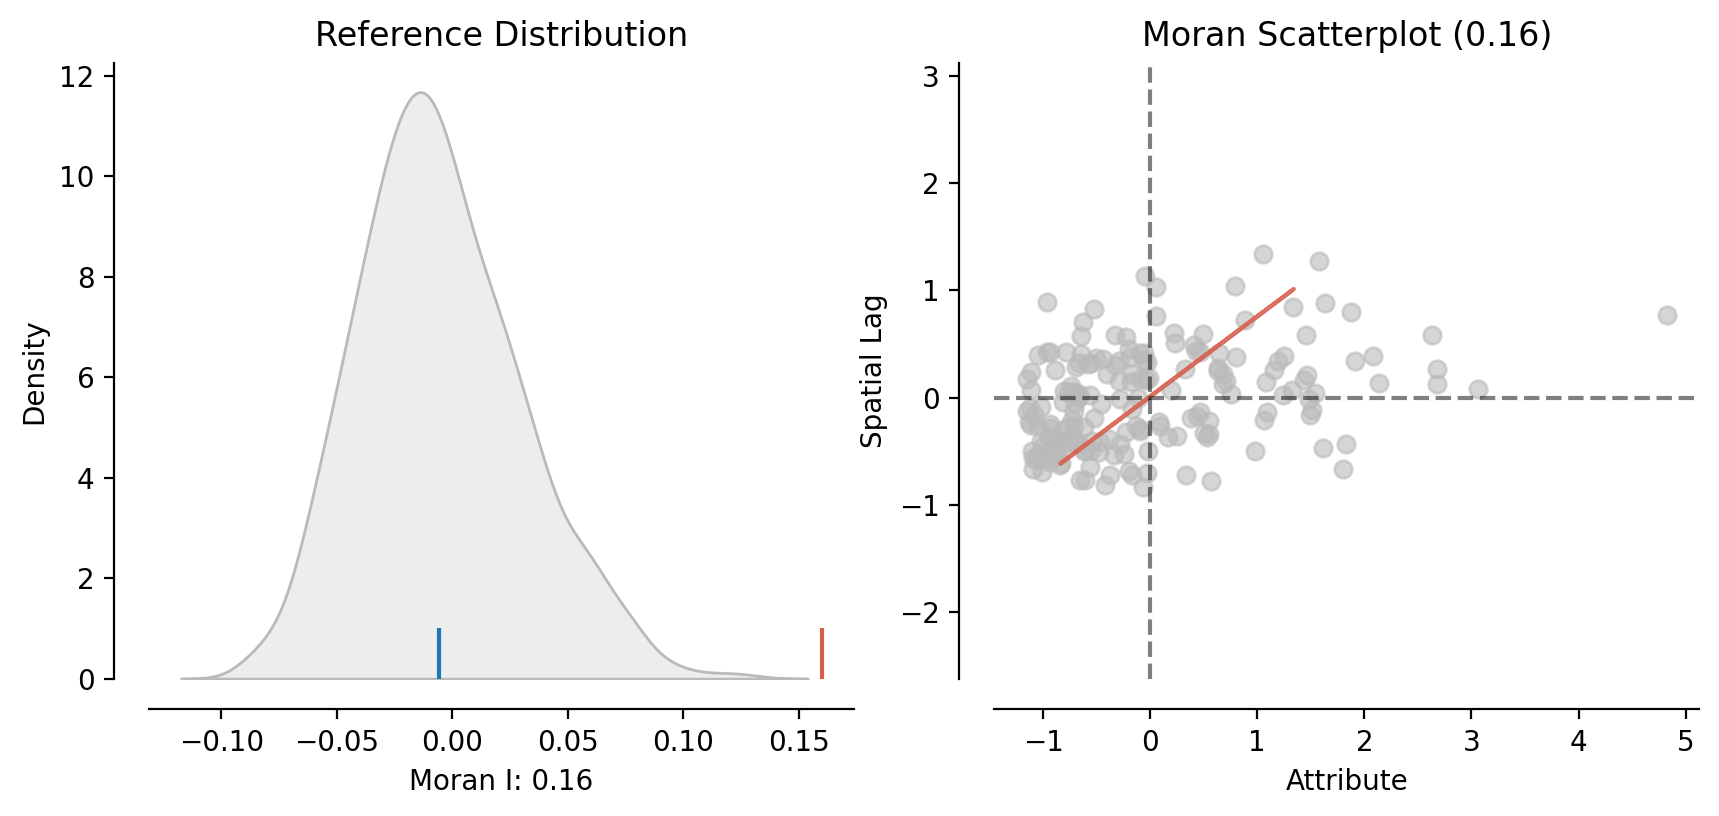

In [39]:
plot_moran(mi)

(<Figure size 1000x400 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Reference Distribution'}, xlabel='Moran I: 0.29', ylabel='Density'>,
        <AxesSubplot:title={'center':'Moran Scatterplot (0.29)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

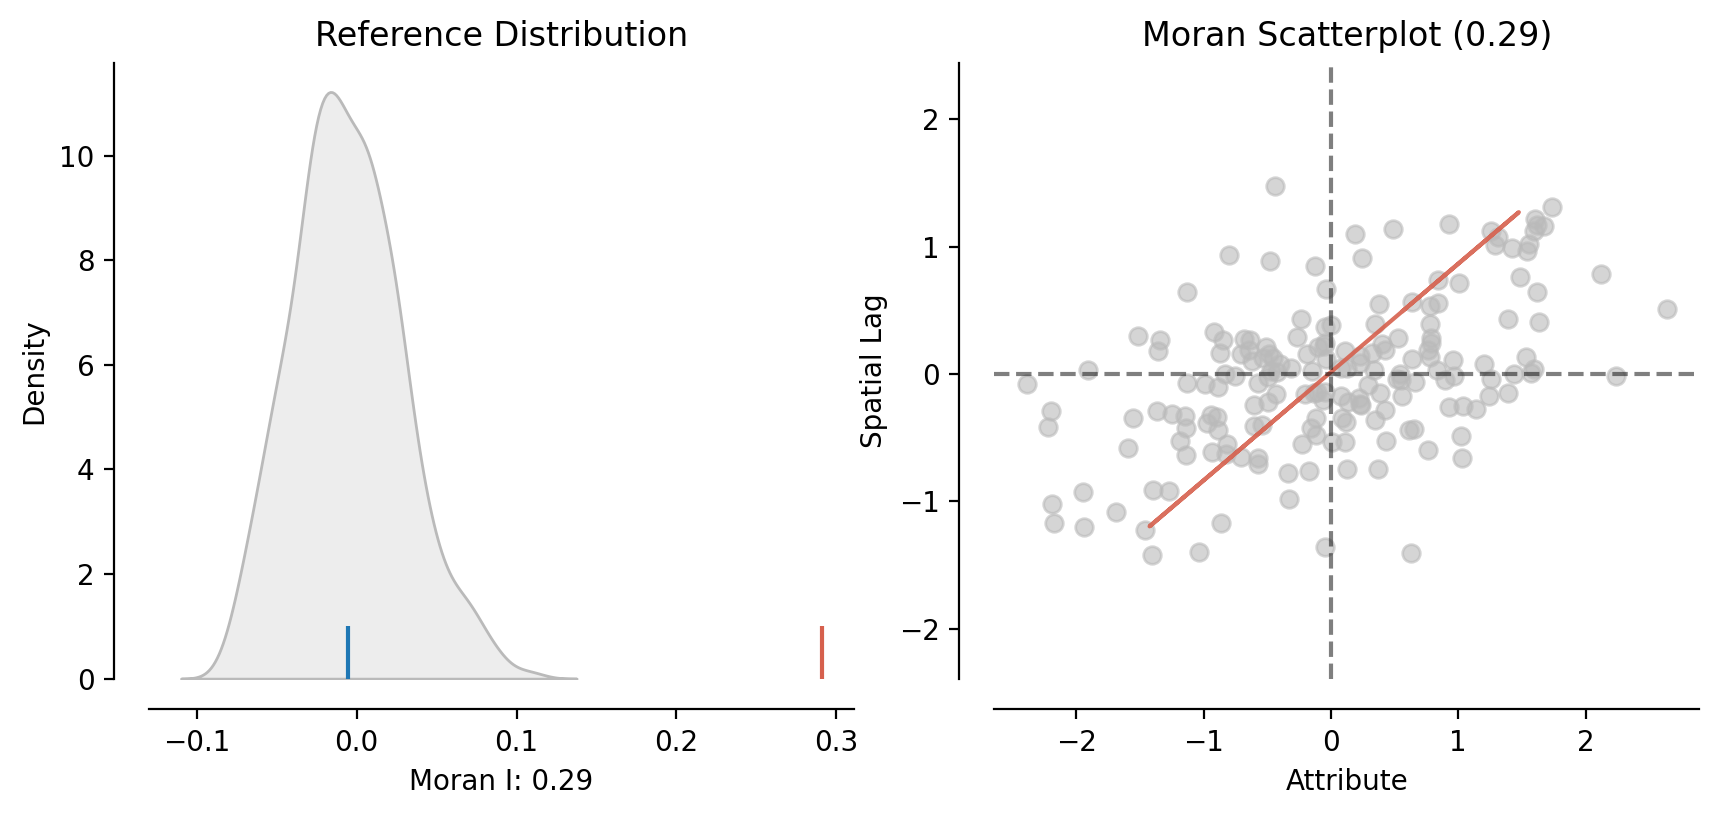

In [54]:
plot_moran(mi_pct)

In [43]:
ml = Moran_Local(df_transformed.seg_difference.values, w)

In [57]:
t = Moran_Local.by_col(df_transformed, ['seg_difference', 'pct_diff'], w)

In [58]:
t

,geometry,planar_measure,network_measure,streets_per_node_avg,street_length_total,street_segment_count,street_length_avg,intersection_count,intersection_density_km,self_loop_proportion,...,node_props_3way,street_density_km,meshedness,k_avg,gamma,circuity_avg,seg_difference_moran_local,seg_difference_p_sim,pct_diff_moran_local,pct_diff_p_sim
geoid,,,,,,,,,,,,,,,,,,,,,
10180,"POLYGON ((-100.14654 32.52279, -100.14642 32.5...",-2.272904,-1.974468,1.036759,16.216310,10.729919,5.486391,10.199733,1.326595,1.655073,...,1.235438,-0.713061,0.950304,0.950218,0.950307,-0.626938,0.271375,0.006,-0.256833,0.243
10420,"POLYGON ((-81.39169 41.34827, -81.39164 41.348...",-1.382853,-1.241819,0.970513,16.399908,11.998784,4.401124,11.438267,3.658473,0.025155,...,0.047209,2.611625,-0.315451,-0.314636,-0.315481,-0.033997,-0.041006,0.112,0.387813,0.099
10540,"POLYGON ((-123.25099 44.55198, -123.25240 44.5...",-2.562213,-2.192703,0.896348,16.181679,10.498857,5.682823,9.930568,1.236146,0.802874,...,0.272766,-0.513782,-1.662444,-1.662466,-1.662442,2.718630,0.221616,0.107,1.884543,0.001
10580,"POLYGON ((-74.09298 42.95587, -74.09381 42.959...",-1.843335,-1.615028,0.974327,16.812190,11.904853,4.907338,11.366523,2.450517,2.186480,...,1.370005,0.236492,-0.242604,-0.241820,-0.242633,0.053736,0.117555,0.081,0.010754,0.463
10900,"POLYGON ((-75.75781 40.73541, -75.75953 40.736...",-1.567313,-1.409252,0.991730,16.695306,12.003724,4.691582,11.452814,3.205232,-0.233136,...,0.419110,1.881552,0.088403,0.089211,0.088378,-0.148260,0.150084,0.126,0.242945,0.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,"POLYGON ((-80.45193 36.26151, -80.45192 36.261...",-1.283829,-1.178139,0.889060,16.762570,12.064734,4.697836,11.496806,2.925126,0.825052,...,0.400881,1.002622,-1.782479,-1.781620,-1.782532,-0.011005,0.577014,0.031,0.922766,0.048
49340,"POLYGON ((-72.10217 42.02887, -72.10242 42.028...",-1.857255,-1.609773,0.927987,16.872761,12.229731,4.643031,11.661949,3.059780,0.256735,...,0.004621,1.251643,-1.105152,-1.104267,-1.105197,0.029594,0.264012,0.125,0.001562,0.494
49620,"POLYGON ((-77.05440 40.02321, -77.05441 40.023...",-1.560098,-1.415226,0.927719,16.169092,11.406731,4.762361,10.839385,3.073734,0.078213,...,0.024647,1.713468,-1.106913,-1.106298,-1.106944,-0.062939,0.210870,0.205,0.444849,0.053


In [59]:
Moran.by_col?

Signature:
Moran.by_col(
    df,
    cols,
    w=None,
    inplace=False,
    pvalue='sim',
    outvals=None,
    **stat_kws,
)
Docstring:
Function to compute a Moran statistic on a dataframe

Parameters
----------
df          :   pandas.DataFrame
                a pandas dataframe with a geometry column
cols        :   string or list of string
                name or list of names of columns to use to compute the statistic
w           :   pysal weights object
                a weights object aligned with the dataframe. If not provided, this
                is searched for in the dataframe's metadata
inplace     :   bool
                a boolean denoting whether to operate on the dataframe inplace or to
                return a series contaning the results of the computation. If
                operating inplace, the derived columns will be named
                'column_moran'
pvalue      :   string
                a string denoting which pvalue should be returned. Refer to the
      

In [47]:
from splot.esda import lisa_cluster

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

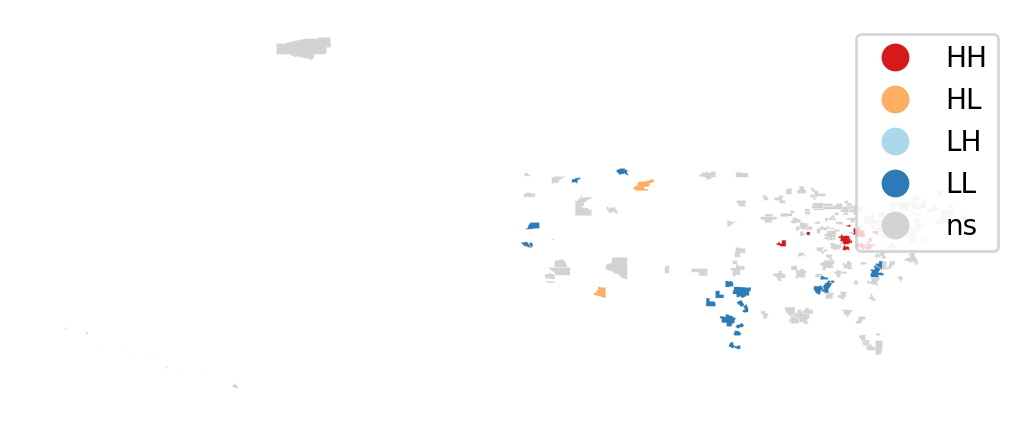

In [50]:
lisa_cluster(ml, df_transformed)

(<Figure size 1500x400 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

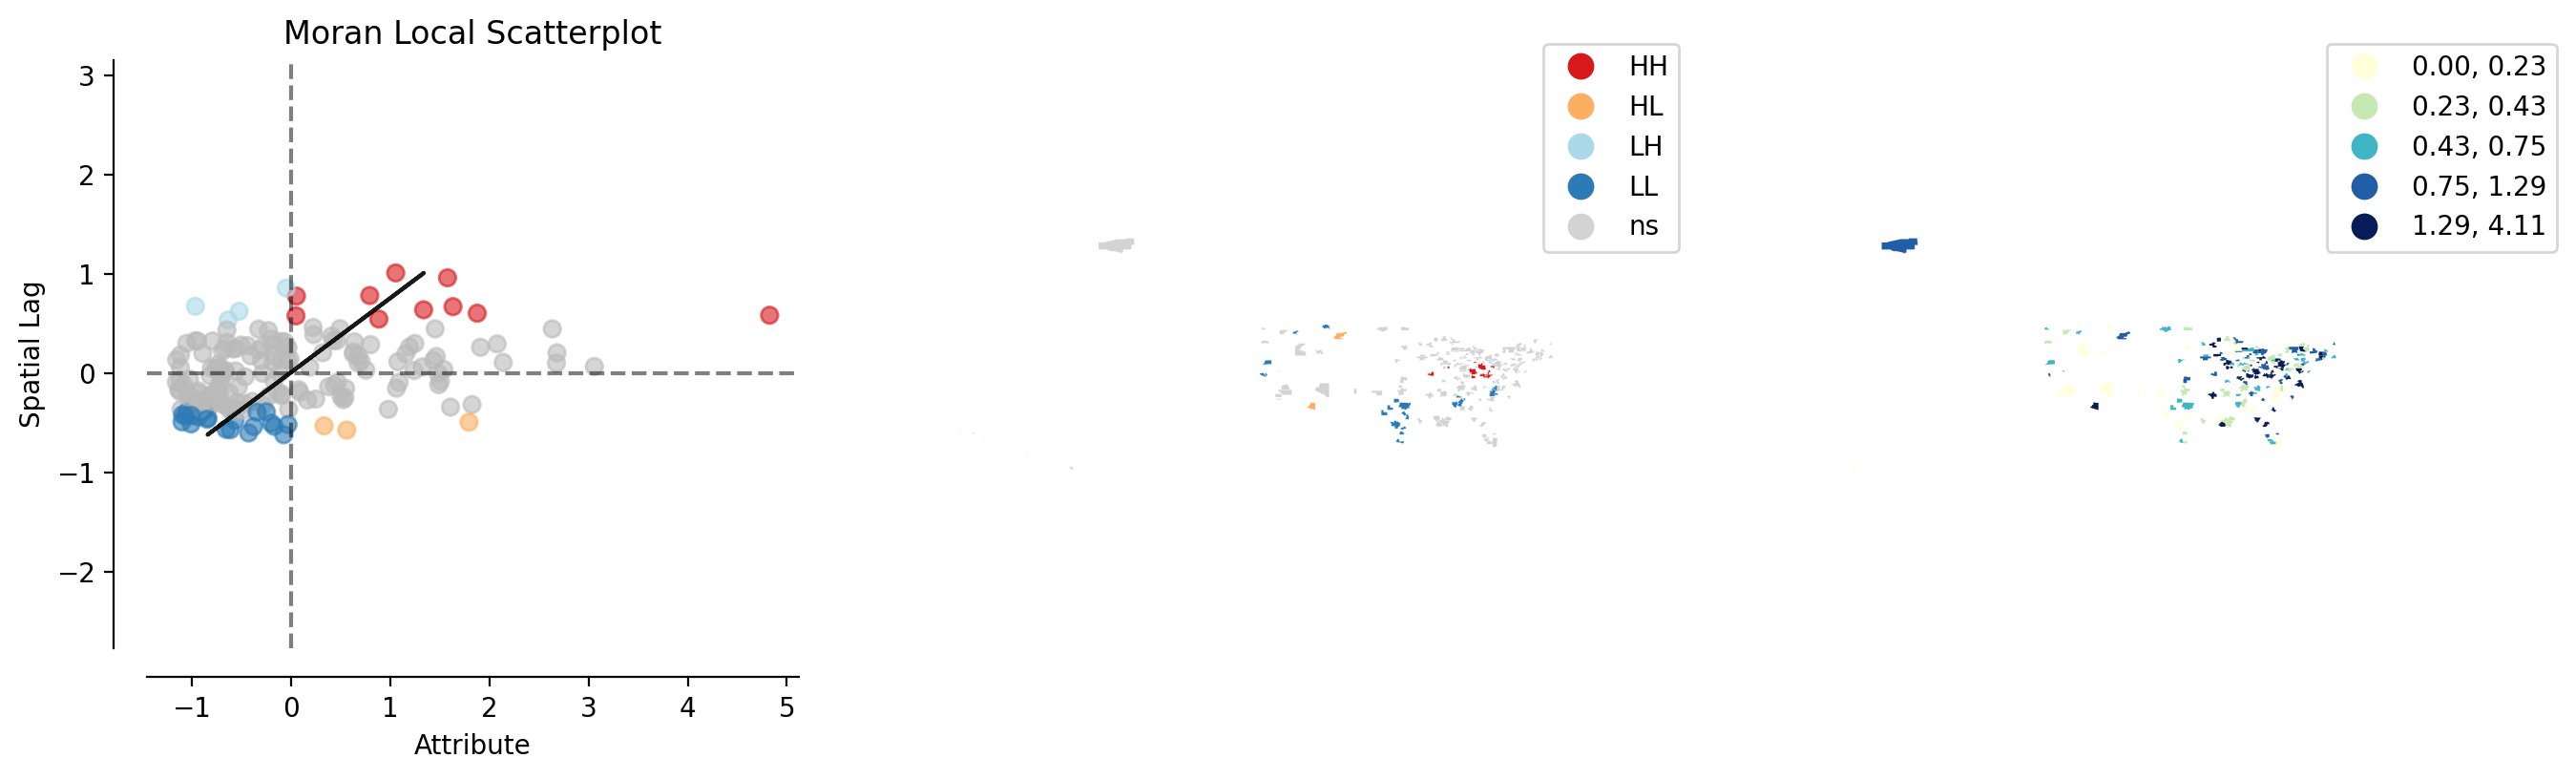

In [46]:
plot_local_autocorrelation(ml, df_transformed, 'seg_difference')